# Visualization with Seaborn

Reference: https://seaborn.pydata.org/ or https://seaborn.pydata.org/introduction.html

Seaborn is a library for making statistical graphs in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

**Table of Content**

1. [Create a barplot](#sec1)
2. [Create a scatterplot](#sec2)
3. [Create a heatmap](#sec3)

As usually, you might need to install the library if you are using miniconda.

In [ ]:
pip install seaborn

Let's then import the packages we need:

In [1]:
import seaborn as sns # notice the short name for seaborn
import json
import matplotlib.pyplot as plt # this is useful, when we want to access the underlying plot features

As in other Python data science libraries, seaborn also comes with several datasets included, that can be used for illustration.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

We will use different ones in this notebook. The Seaborn documentation refers to several of these datasets, so it's worth spending a bit of time familarizing yourself with a dataset, whenever it's used in an example.

We do this by first loading a dataset and then inspecting its dataframe, as shown below:

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<a id="sec1"></a>
## 1. Create a barplot

In Seaborn, a barplot shows point estimates and confidence intervals as rectangular bars. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

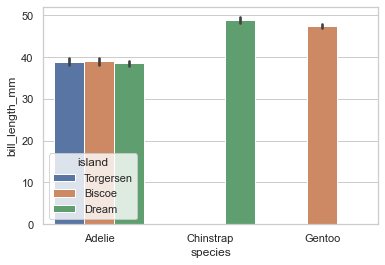

In [5]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(x="species", 
                  y="bill_length_mm", 
                  data=penguins, 
                  hue="island")

Two things here:
- the legend is shown on top of the bars, that is not a good idea, we might want to move it somewhere else
- there is not much free space for the legend elsewehere, so we might want to increase the size of the figure first

To do both these things, we need to access the underlying plot on top of which seaborn is drawing. We do that, via the `plt` object.

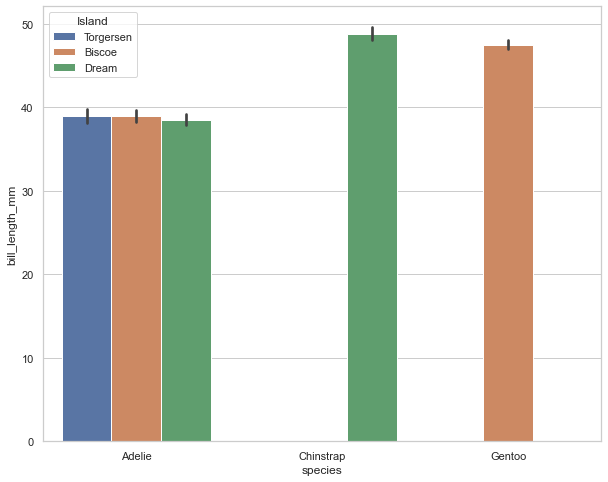

In [6]:
plt.figure(figsize=(10,8))

fig = sns.barplot(x="species", 
                  y="bill_length_mm", 
                  data=penguins, 
                  hue="island")

plt.legend(loc='upper left', title="Island")

<a id='sec2'></a>
## 2. Create a  scatterplot

It is a simple as invoking the function with the dataframe and specifying a few named parameters.

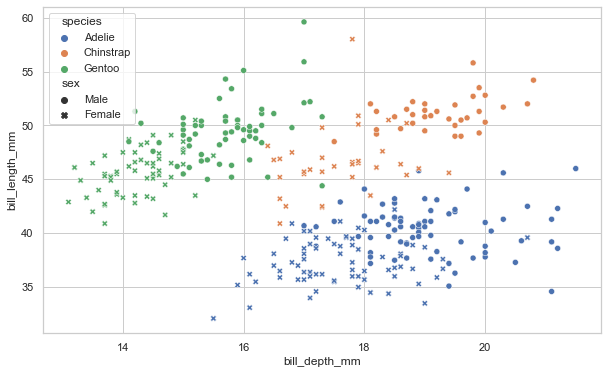

In [7]:
plt.figure(figsize=(10,6))
fig1 = sns.scatterplot(data=penguins, 
                       x="bill_depth_mm", 
                       y="bill_length_mm", 
                       hue="species", 
                       style="sex")

We can use `relplot` to combine `FacetGrid` and `scatterplot`

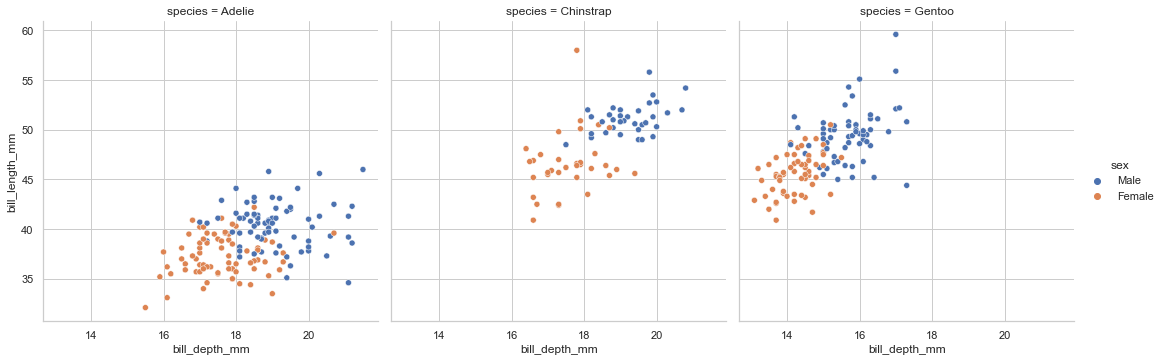

In [8]:
fig2 = sns.relplot(data=penguins, 
                   x="bill_depth_mm", 
                   y="bill_length_mm", 
                   col="species", 
                   hue="sex")

We can use `regplot` to plot data and a linear regression model fit. We can also use `lmplot` to combine `regplot` and `FacetGrid`.

In [9]:
# I'm interested in seeing the relationship between bill length and bill depth
# for penguins of species Adelie
df3 = penguins[penguins['species']=='Adelie']
df3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


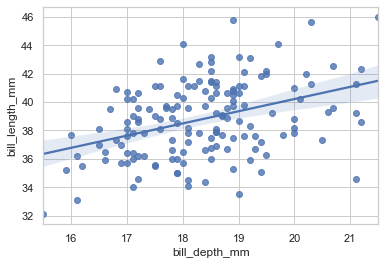

In [10]:
fig3 = sns.regplot(data=df3, 
                   x="bill_depth_mm", 
                   y="bill_length_mm")

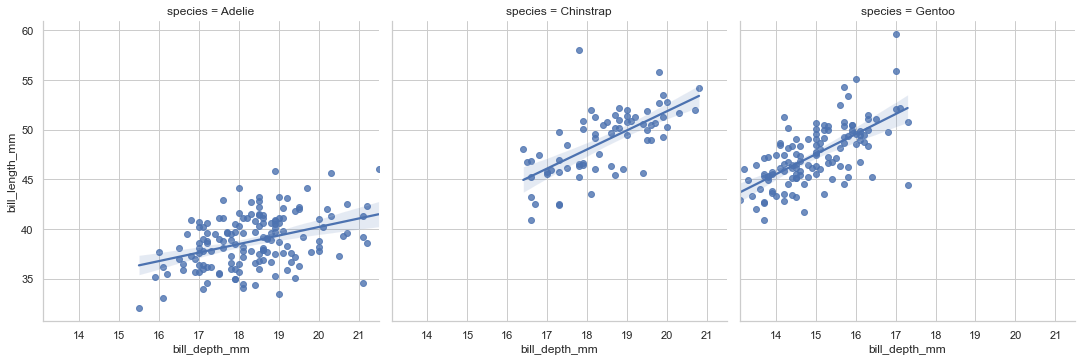

In [11]:
fig4 = sns.lmplot(data=penguins, 
                  x='bill_depth_mm', 
                  y='bill_length_mm', 
                  col='species')

<a id="sec3"></a>
## 3. Create a heatmap

Here we will use our own dataset `positional.json` again. Remember that to create a heatmap, we need to have a matrix or rectangular dataset.

In [ ]:
with open("positional.json", "r") as infile:
    pos = json.load(infile)

In [ ]:
print(pos)

In [ ]:
# here's how our matrix (10x10) looks like:
matr = [ii for ii in pos.values()]
matr

Now that we have a matrix like this, we simply call the function heatmap:

In [ ]:
fig5 = sns.heatmap(matr)

### Your Turn:

The default heatmap doesn't look that nice. Do two things:

- make the figure larger (as we have shown above)
- apply a different color map

Show your code and new heatmap below: